# DBSCAN

In this notebook, I'll be exploring the DBSCAN algorithm for analysing the Gaia data for stellar clusters. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Import the data:
with open('Data/cleaned_dataframe_subset.pkl', 'rb') as f:
    df = pickle.load(f)

df.head(8)

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi
0,575388179144704,46.586249,0.451140,1.489403,0.566506,0.245852,0.652412,6.959413,0.939823,-2.869646,0.892436,False,NaN,NaN,NaN,NaN,1.0,1116.827227,748.928101,1713.798538
1,575456898624000,46.629160,0.585416,1.500458,0.636628,3.538279,0.767726,11.109998,1.269826,-15.447752,1.211021,False,NaN,NaN,NaN,NaN,1.0,296.639704,232.068021,408.570033
2,575559977808000,46.619333,0.111619,1.517034,0.108919,1.543781,0.138637,-7.319485,0.202482,-13.131690,0.207530,False,NaN,NaN,4092.17725,0.085104,1.0,636.392779,583.107495,700.057416
3,575559977809920,46.624884,0.293061,1.521894,0.335015,0.667886,0.426745,11.569505,0.653785,2.405117,0.614614,False,NaN,NaN,NaN,NaN,1.0,1076.209874,768.773445,1590.773702
6,575628697283456,46.684003,0.507014,1.514996,0.562390,0.671345,0.669175,3.062812,1.096600,-5.161016,1.044574,False,NaN,NaN,NaN,NaN,1.0,952.605502,629.470827,1517.572847
7,575663057019136,46.660431,0.428231,1.505106,0.506110,1.649634,0.633313,1.398725,0.957734,1.455517,0.965698,False,NaN,NaN,NaN,NaN,1.0,612.514394,425.308370,993.700453
8,575663057021312,46.663176,0.409746,1.512559,0.452759,0.793609,0.541798,3.835206,0.900692,-5.055062,0.868309,False,NaN,NaN,NaN,NaN,1.0,951.716897,656.389168,1467.806195
9,575697416760832,46.667729,0.370422,1.516735,0.374226,1.051860,0.445161,11.847218,0.826480,-5.844509,0.745895,False,NaN,NaN,NaN,NaN,1.0,854.429413,618.123184,1274.059233


In [2]:
df.describe()

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi
count,1.448060e+05,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,2884.000000,2884.000000,38264.000000,27605.000000,144806.000000,144806.000000,144806.000000,144806.000000
mean,5.806292e+16,45.667128,0.364385,14.404714,0.311368,1.266455,0.429614,5.364624,0.776553,-6.445491,0.693967,2.624768,2.116272,4937.922456,3.374990,1.502293,1052.323837,821.602990,1432.487008
std,5.448575e+16,2.705760,0.364798,10.360857,0.301396,1.398750,0.425948,14.789071,0.783741,12.691960,0.744909,36.033567,2.545359,608.842748,25.048640,0.499996,610.957379,520.527775,765.761830
min,5.753882e+14,39.397370,0.016614,1.215032,0.013412,0.000027,0.019115,-220.151361,0.032469,-924.894224,0.029633,-214.838053,0.110120,3243.000000,0.029058,1.000000,8.607152,8.600576,8.613737
25%,3.330647e+15,43.320436,0.094899,4.130097,0.080073,0.469400,0.111194,-0.240062,0.197310,-9.062746,0.168166,-18.595147,0.658322,4623.054203,0.227252,1.000000,630.238163,455.751966,872.145084
50%,1.108307e+17,46.204723,0.237451,22.350257,0.204065,0.907139,0.280981,2.936788,0.494771,-4.112792,0.419626,3.976430,1.304933,4972.500000,0.566464,2.000000,929.940575,680.813133,1391.978277
75%,1.122491e+17,47.919100,0.522795,24.612546,0.456171,1.631365,0.621832,8.022298,1.091172,-0.958761,0.926415,23.855239,2.495388,5325.000000,1.430993,2.000000,1342.008153,1063.006154,1845.257483
max,1.496924e+17,65.555744,3.681530,27.274562,2.391855,116.153585,4.106983,1741.859304,5.136050,223.695497,4.661877,242.938548,19.906323,9632.666990,1796.698970,2.000000,7101.204768,6356.833734,8021.140696


In [3]:
def pm_to_v(pm, d):
    """
    Converts a proper motion column to a velocity column, requiring the distance
    in parsecs. Assumes the proper motions have units of milliarcseconds per year 
    (mas/yr).
    """
    pm_arcsec = pm * 1.0e-3     # Converting to arc seconds per year
    v = pm_arcsec * 4.74 * d    # Answer in kilometers per second
    
    return v

In [4]:
# Create my X matrix and get everything into the correct units:
X = df[['ra', 'dec', 'r_est', 'pmra', 'pmdec']].copy()
X.loc[:,'pmra'] = pm_to_v(X.loc[:, 'pmra'], X.loc[:, 'r_est'])
X.loc[:,'pmdec'] = pm_to_v(X.loc[:, 'pmdec'], X.loc[:, 'r_est'])
X.loc[:,'ra'] *= 60.0
X.loc[:,'dec'] *= 60.0

In [5]:
X.describe()

,ra,dec,r_est,pmra,pmdec
count,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000
mean,2740.027666,864.282840,1052.323837,19.873426,-24.176676
std,162.345598,621.651438,610.957379,36.505126,33.730821
min,2363.842205,72.901926,8.607152,-180.094581,-672.998768
25%,2599.226142,247.805818,630.238163,-1.173514,-37.211261
50%,2772.283401,1341.015440,929.940575,13.738820,-18.702958
75%,2875.145999,1476.752773,1342.008153,33.846675,-4.684253
max,3933.344644,1636.473705,7101.204768,774.429205,241.439190


In [6]:
# The difficulty with DBSCAN is I have to figure out good values for the two hyperparameters,
# eps and min_samples, which are not obvious when the data isn't standardized. So I will do that:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X.head(20))
print(X_scaled[0:20])

             ra        dec        r_est        pmra      pmdec
0   2795.174925  89.364166  1116.827227   36.841470 -15.191223
1   2797.749576  90.027473   296.639704   15.621460 -21.720655
2   2797.160004  91.022040   636.392779  -22.079240 -39.611767
3   2797.493060  91.313632  1076.209874   59.018763  12.269067
6   2801.040203  90.899756   952.605502   13.829670 -23.303793
7   2799.625852  90.306388   612.514394    4.060944   4.225830
8   2799.790550  90.753546   951.716897   17.301145 -22.804081
9   2800.063739  91.004125   854.429413   47.981178 -23.670235
10  2799.732321  91.356554  2063.871411   12.406284   3.764437
11  2800.263996  91.321165  1186.178810   12.446128  -0.733933
12  2801.374036  90.923903   221.054642  -29.563517 -27.246848
13  2801.933660  91.038677   428.468564   -4.188024 -32.329545
15  2800.088575  92.727309   337.288966   24.002531  23.781525
19  2789.477180  85.639952   512.295714  -13.242704  -4.658074
20  2790.159486  86.340476   417.412465    4.889608 -26

In [7]:
# I guess let's give it a go!

dbscan = DBSCAN(eps = 0.25, min_samples = 20)
clusters = dbscan.fit_predict(X_scaled)

print(np.unique(clusters, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20]), array([70178, 31606,    28,    21,    18,    16,    17,    18,    12,
          30,    13,    14,    20, 42705,    15,    17,    22,    10,
           9,    10,    11,    16]))


In [8]:
# Define 21 colors for the plotting:
colors = {'p':'#7741C8', 'r':'#F50C0C', 'm':'#F50CA3', 'b':'#2B0CF5', 'c':'#0CE5F5', 'l':'#33F50C', 't':'#4DCE9B',
          'g':'#1D5911', 'y':'#BFB91E', 'o':'#F2A52A', 'k':'#A4A4A4', 'w':'#5A3A06', 'v':'#BD93D2', 'd':'#FFD900',
          'n':'#FF7300', 'e':'#9A00FA', 'j':'#00AAFF', 's':'#D18787', 'a':'#3E6F6B', 'q':'#651A4C', 'h':'#720119'}
colkeys = ['p', 'r', 'o', 'b', 'c', 'm', 'g', 'y', 'l', 'k', 't', 'w', 'v', 'd', 'n', 'e', 'j', 's', 'q', 'h', 'a']

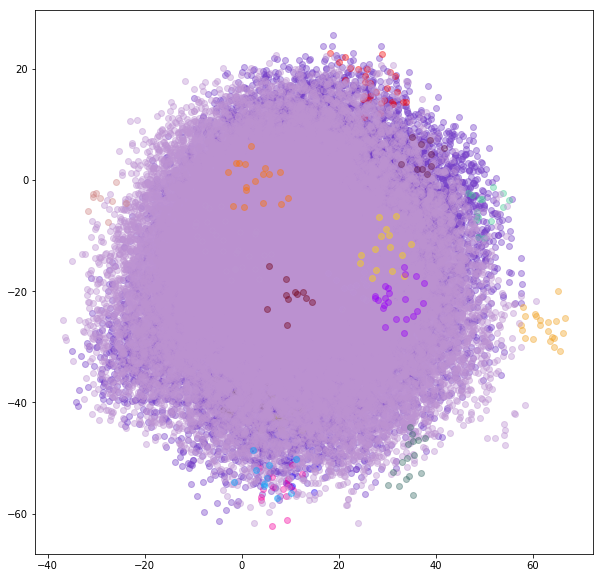

In [9]:
X.loc[:, 'label'] = clusters.copy()

# Plot the cluster assignments in velocity space:
fig, ax = plt.subplots(figsize=(10,10))
for label in np.unique(clusters):
    cluster_n = X.loc[X.label==label].copy()
    if label == -1:
        #_ = ax.scatter(cluster_n['pmra'].values, cluster_n['pmdec'].values, c='k', alpha=0.3)
        pass
    else:
        _ = ax.scatter(cluster_n['pmra'].values, cluster_n['pmdec'].values, c=colors[colkeys[label]], alpha=0.4)
plt.show()

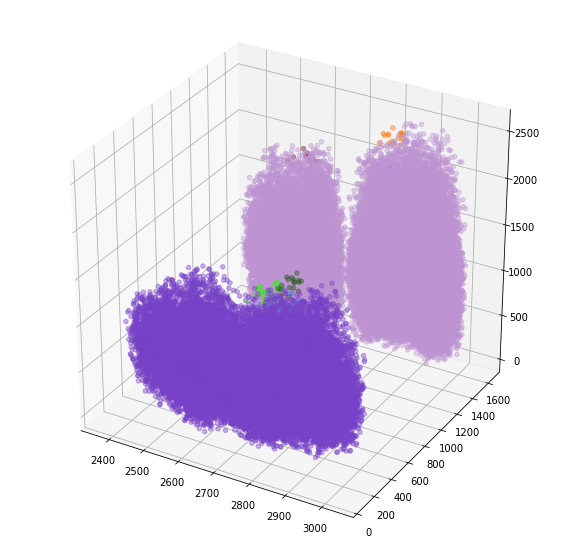

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the cluster assignments in spatial dimensions:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(clusters):
    cluster_n = X.loc[X.label==label].copy()
    if label == -1:
        #_ = ax.scatter(cluster_n['ra'].values, cluster_n['dec'].values, cluster_n['r_est'].values, c='k', alpha=0.3)
        pass
    else:
        _ = ax.scatter(cluster_n['ra'].values, cluster_n['dec'].values, cluster_n['r_est'].values,
                       c=colors[colkeys[label]], alpha=0.4)
plt.show()

In [11]:
# Another attempt:

dbscan2 = DBSCAN(eps = 0.4, min_samples = 50)
clusters2 = dbscan2.fit_predict(X_scaled)

print(np.unique(clusters2, return_counts=True))

(array([-1,  0,  1]), array([32337, 53353, 59116]))


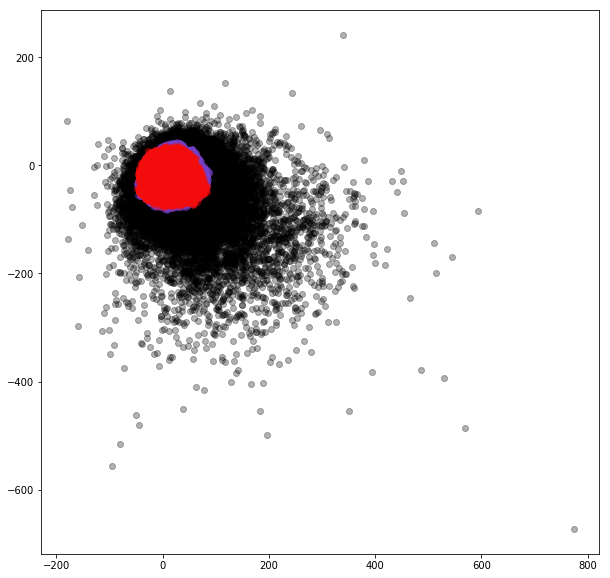

In [12]:
X.loc[:, 'label'] = clusters2.copy()

# Plot the cluster assignments in velocity space:
fig, ax = plt.subplots(figsize=(10,10))
for label in np.unique(clusters2):
    cluster_n = X.loc[X.label==label].copy()
    if label == -1:
        _ = ax.scatter(cluster_n['pmra'].values, cluster_n['pmdec'].values, c='k', alpha=0.3)
        #pass
    else:
        _ = ax.scatter(cluster_n['pmra'].values, cluster_n['pmdec'].values, c=colors[colkeys[label]], alpha=0.4)
plt.show()

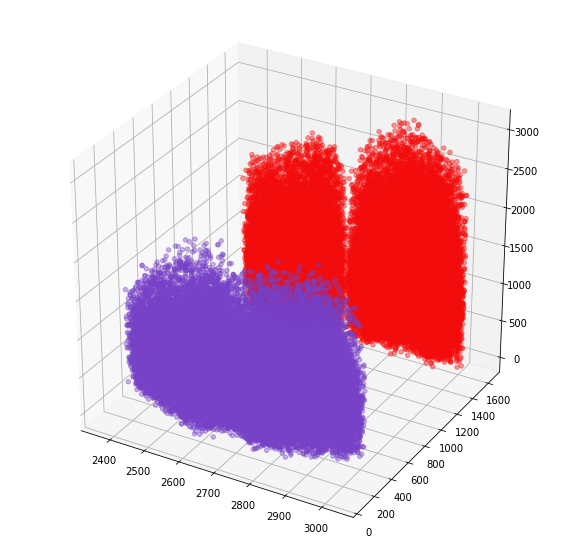

In [13]:
# Plot the cluster assignments in spatial dimensions:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(clusters2):
    cluster_n = X.loc[X.label==label].copy()
    if label == -1:
        #_ = ax.scatter(cluster_n['ra'].values, cluster_n['dec'].values, cluster_n['r_est'].values, c='k', alpha=0.3)
        pass
    else:
        _ = ax.scatter(cluster_n['ra'].values, cluster_n['dec'].values, cluster_n['r_est'].values,
                       c=colors[colkeys[label]], alpha=0.4)
plt.show()

In [14]:
# A third attempt:

dbscan3 = DBSCAN(eps = 0.18, min_samples = 20)
clusters3 = dbscan3.fit_predict(X_scaled)

print(np.unique(clusters3, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76]), array([131973,     73,     34,     81,     16,     20,     22,    105,
           96,     20,     17,     12,    619,     52,     27,     20,
           20,     51,     24,     18,     57,     24,     44,     21,
           26,     21,     19,     21,     22,   8058,     20,     19,
           20,     16,     15,      9,     17,     18,     19,     18,
           16,     16,     18,     18,     17,     21,     71,     19,
           70,     36,     16,     18,     18,     20,     20,   2101,
           47,     21,     20,     17,     21,     17,     21,     16,
           19,     16,     43,     16,     63,     39,     17,     21,
           

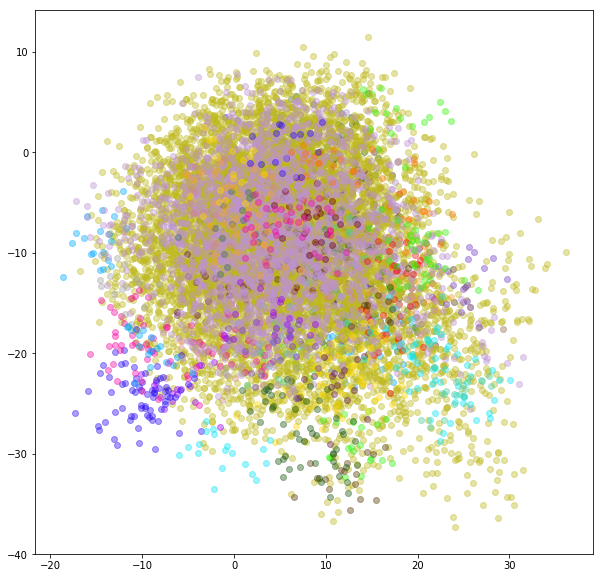

In [15]:
X.loc[:, 'label'] = clusters3.copy()

# Plot the cluster assignments in velocity space:
fig, ax = plt.subplots(figsize=(10,10))
for label in np.unique(clusters3):
    cluster_n = X.loc[X.label==label].copy()
    if label == -1:
        #_ = ax.scatter(cluster_n['pmra'].values, cluster_n['pmdec'].values, c='k', alpha=0.3)
        pass
    else:
        _ = ax.scatter(cluster_n['pmra'].values, cluster_n['pmdec'].values, c=colors[colkeys[label%21]], alpha=0.4)
plt.show()

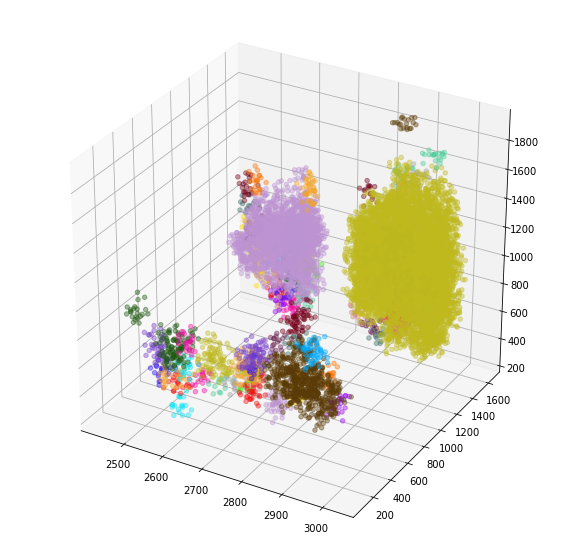

In [16]:
# Plot the cluster assignments in spatial dimensions:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(clusters3):
    cluster_n = X.loc[X.label==label].copy()
    if label == -1:
        #_ = ax.scatter(cluster_n['ra'].values, cluster_n['dec'].values, cluster_n['r_est'].values, c='k', alpha=0.3)
        pass
    else:
        _ = ax.scatter(cluster_n['ra'].values, cluster_n['dec'].values, cluster_n['r_est'].values,
                       c=colors[colkeys[label%21]], alpha=0.4)
plt.show()

# Metric Analysis: Did the algorithm work?

(Some background here)

In [20]:
df2 = df.copy()
df2.loc[:, 'label'] = clusters3.copy()

In [21]:
df2.head(10)

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,duplicated_source,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi,label
0,575388179144704,46.586249,0.451140,1.489403,0.566506,0.245852,0.652412,6.959413,0.939823,-2.869646,...,False,NaN,NaN,NaN,NaN,1.0,1116.827227,748.928101,1713.798538,-1
1,575456898624000,46.629160,0.585416,1.500458,0.636628,3.538279,0.767726,11.109998,1.269826,-15.447752,...,False,NaN,NaN,NaN,NaN,1.0,296.639704,232.068021,408.570033,-1
2,575559977808000,46.619333,0.111619,1.517034,0.108919,1.543781,0.138637,-7.319485,0.202482,-13.131690,...,False,NaN,NaN,4092.17725,0.085104,1.0,636.392779,583.107495,700.057416,-1
3,575559977809920,46.624884,0.293061,1.521894,0.335015,0.667886,0.426745,11.569505,0.653785,2.405117,...,False,NaN,NaN,NaN,NaN,1.0,1076.209874,768.773445,1590.773702,-1
6,575628697283456,46.684003,0.507014,1.514996,0.562390,0.671345,0.669175,3.062812,1.096600,-5.161016,...,False,NaN,NaN,NaN,NaN,1.0,952.605502,629.470827,1517.572847,-1
7,575663057019136,46.660431,0.428231,1.505106,0.506110,1.649634,0.633313,1.398725,0.957734,1.455517,...,False,NaN,NaN,NaN,NaN,1.0,612.514394,425.308370,993.700453,-1
8,575663057021312,46.663176,0.409746,1.512559,0.452759,0.793609,0.541798,3.835206,0.900692,-5.055062,...,False,NaN,NaN,NaN,NaN,1.0,951.716897,656.389168,1467.806195,-1
9,575697416760832,46.667729,0.370422,1.516735,0.374226,1.051860,0.445161,11.847218,0.826480,-5.844509,...,False,NaN,NaN,NaN,NaN,1.0,854.429413,618.123184,1274.059233,-1
10,575697416763776,46.662205,0.118184,1.522609,0.123541,0.262377,0.150933,1.268180,0.248033,0.384804,...,False,NaN,NaN,NaN,NaN,1.0,2063.871411,1655.938736,2634.184563,-1
11,575697416796288,46.671067,0.360059,1.522019,0.380800,0.438873,0.457596,2.213634,0.784292,-0.130535,...,False,NaN,NaN,NaN,NaN,1.0,1186.178810,835.373893,1754.354613,-1


In [22]:
def calc_stellar_dist(ra1, ra2, dec1, dec2, r_est1, r_est2):
    """
    Calculates the distances between two stars in space (or a star and a cluster center).
    
    """
    
    # Spherical geometric distance(r_est = r, ra = phi, dec = theta):
    dist_sq = (r_est1**2.0) + (r_est2**2.0) - \
               (2*r_est1*r_est2*(np.sin(dec1)*np.sin(dec2)*np.cos(ra1-ra2) + np.cos(dec1)*np.cos(dec2)))
    dist = np.sqrt(dist_sq)
    
    return dist

In [24]:
# For each cluster, calculate the distances of each member to its cluster center, also
# collecting the velocity distributions along the way:
d_dists = {}
pmra_dists = {}
pmdec_dists = {}

for i in range(77):
    # Get data on all stars in the specific cluster:
    cluster = df2.loc[df2.label==i, :]
    
    # Convert ra and dec into radians from degrees:
    ra_rads = cluster.ra.values * (np.pi/180.)
    dec_rads = cluster.dec.values * (np.pi/180.)
    
    # Get cluster center's spatial coordinates by calculating a center point via an average:
    avg_ra = np.zeros(len(ra_rads)) + np.mean(ra_rads)
    avg_dec = np.zeros(len(ra_rads)) + np.mean(dec_rads)
    avg_dist = np.zeros(len(ra_rads)) + np.mean(cluster.r_est.values)
    
    # Calculate the distances to the center:
    dist_calc = np.vectorize(calc_stellar_dist)
    d_dists[i+1] = dist_calc(ra_rads, avg_ra, dec_rads, avg_dec, cluster.r_est.values, avg_dist)
    
    # Store the velocity distributions too:
    pmra_dists[i+1] = pm_to_v(cluster.pmra.values, cluster.r_est.values)
    pmdec_dists[i+1] = pm_to_v(cluster.pmdec.values, cluster.r_est.values)
    


In [33]:
np.median(d_dists[29])

173.70164463945258

In [34]:
# Save these as pickles so if I'm disconnected I can work on them later without re-running everything:
with open('Data/d_dists_dbscan.pkl', 'wb') as f:
    pickle.dump(d_dists, f)
with open('Data/pmra_dists_dbscan.pkl', 'wb') as f:
    pickle.dump(pmra_dists, f)
with open('Data/pmdec_dists_dbscan.pkl', 'wb') as f:
    pickle.dump(pmdec_dists, f)

In [36]:
# In order to check on whether the clusters spatially make sense from an astronomical
# perspective, I need to see if it's more compact than a normal distribution. To do that,
# I'll use a bootstrap-with-replacement test:

def bootstrap_1d(data, func):
    """
    This will take a 1d array of data and create a bootstrap replicate
    of the supplied statistical function (mean, median, std, etc.).
    
    """
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates of the supplied statistical function.
    Size here is how many total replicates you wish to draw.
    
    """

    # Initialize array of replicates to be filled:
    bs_replicates = np.empty(size)
    
    # Generate all the replicates and store them
    for i in range(size):
        bs_replicates[i] = bootstrap_1d(data, func)
    
    return bs_replicates

percent_diffs = np.zeros(len(d_dists.keys()))
pmra_disp = percent_diffs.copy()
pmdec_disp = percent_diffs.copy()
for i in d_dists.keys():
    # Let's draw a sufficient number of bootstrap replicates of the standard deviation:
    bs_reps = draw_bs_reps(d_dists[i], np.std, size=10000)
    rep_std = np.mean(bs_reps)
    
    # Compare the percent difference between the two standard deviations:
    stand_dev = np.std(d_dists[i])
    percent_diffs[i-1] = ((rep_std - stand_dev) / stand_dev) * 100.0
    
    # Calculate the p-values
    pass
    
    # Calculate the velocity dispersions:
    pmra_disp[i-1] = np.std(pmra_dists[i])
    pmdec_disp[i-1] = np.std(pmdec_dists[i])
    
print(percent_diffs)

[ -1.06438208  -2.1383368   -1.02787344  -3.80703353  -3.23811715
  -2.75307914  -0.6212323   -0.69920541  -3.38635199  -3.99509868
  -5.09889627  -0.1130847   -1.27480141  -2.75892594  -3.50286578
  -3.31852903  -1.32039365  -2.84878872  -3.48663026  -1.29805718
  -2.50465453  -1.56538544  -3.77057578  -2.33843903  -2.9066328
  -5.17162762  -3.25433096  -3.81282163  -0.02026614  -2.94049948
  -4.77211013  -3.03429646  -4.69286465  -4.04219476  -6.77877021
  -3.90873181  -3.17501118  -4.1342991   -3.49135283  -4.44003094
  -4.1738414   -5.13790324  -5.84152359  -3.71557997  -4.29581005
  -1.1240203   -3.54651022  -1.19217028  -1.76992527  -6.69879731
  -3.62670575  -7.92905307  -3.68916031  -3.48216933  -0.01937248
  -1.55401264  -3.16273069  -3.83375814  -3.78015221  -3.55525913
  -4.30396212  -2.93752115  -4.83341134  -4.62432576  -3.8392453
  -1.55585334  -4.13640321  -0.97291925  -1.8662534   -3.41819083
  -4.17048725  -1.72287372  -6.55105506  -3.34917912 -10.25779853
  -3.5665981

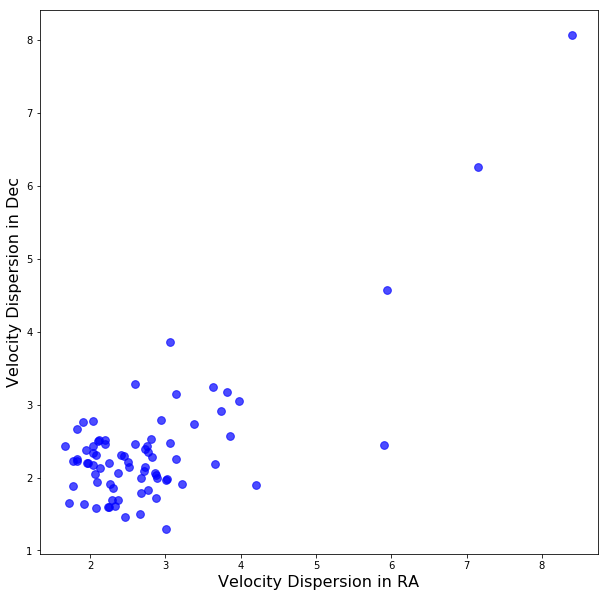

In [37]:
# Plot the dispersions between the two velocities:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(pmra_disp, pmdec_disp, c='blue', s=60, alpha=0.7)
ax.set_xlabel('Velocity Dispersion in RA', fontsize=16)
ax.set_ylabel('Velocity Dispersion in Dec', fontsize=16)
plt.show()

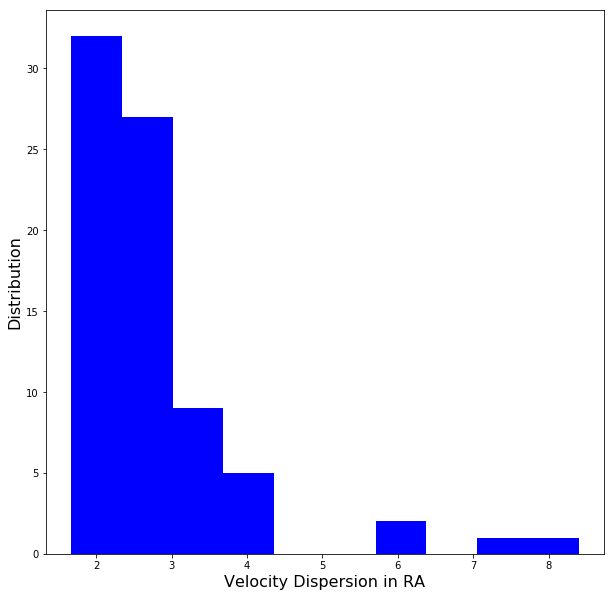

In [38]:
# Plot the Velocity Dispersion (RA) distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(pmra_disp, bins=10, color='blue')
ax.set_xlabel('Velocity Dispersion in RA', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

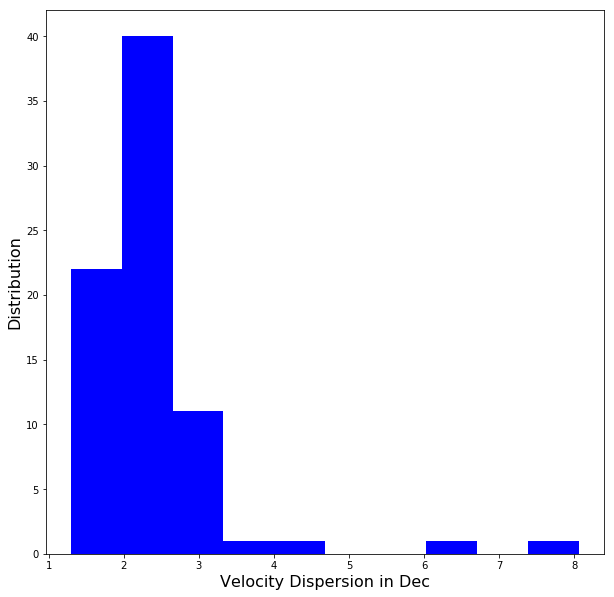

In [39]:
# Plot the Velocity Dispersion (Dec) distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(pmdec_disp, bins=10, color='blue')
ax.set_xlabel('Velocity Dispersion in Dec', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

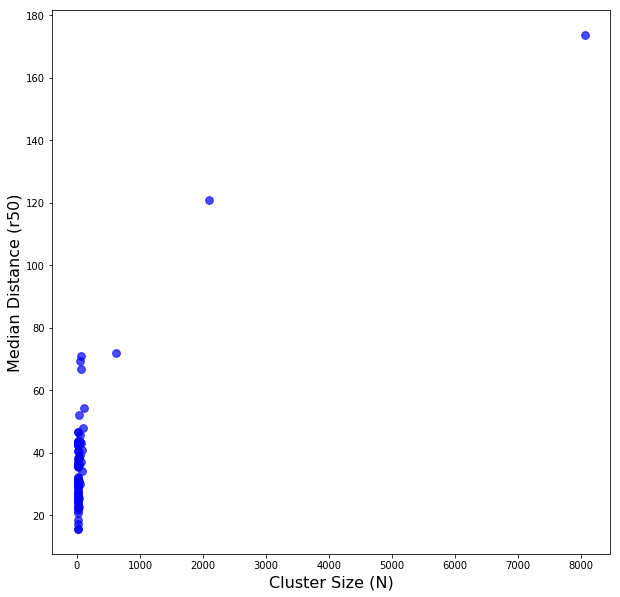

In [40]:
# Calculate the radius (distance) from the center containing 50% of the stars in each cluster:
r_50 = np.zeros(len(d_dists.keys()))
cluster_sizes = r_50.copy()
for i in d_dists.keys():
    r_50[i-1] = np.median(d_dists[i])
    cluster_sizes[i-1] = len(d_dists[i])

# Plot the r_50 versus size of the cluster:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(cluster_sizes, r_50, c='blue', s=60, alpha=0.7)
ax.set_xlabel('Cluster Size (N)', fontsize=16)
ax.set_ylabel('Median Distance (r50)', fontsize=16)
plt.show()

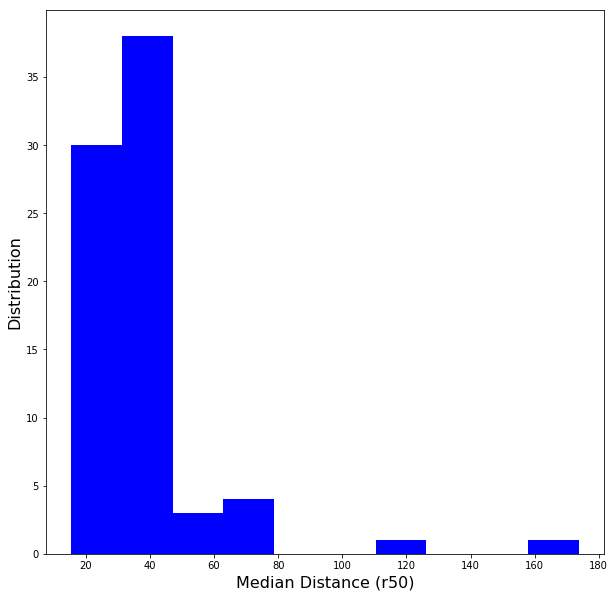

In [41]:
# Plot the r_50 distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(r_50, bins=10, color='blue')
ax.set_xlabel('Median Distance (r50)', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

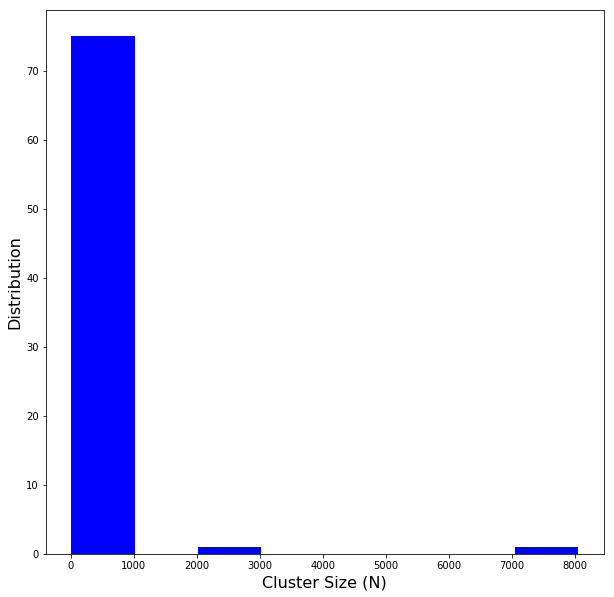

In [47]:
# Plot the cluster size distribution:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.hist(cluster_sizes, bins=8, color='blue')
ax.set_xlabel('Cluster Size (N)', fontsize=16)
ax.set_ylabel('Distribution', fontsize=16)
plt.show()

In [48]:
# Calculate the pearson correlation coefficient between these two variables:
import scipy.stats as st

size_dist = st.pearsonr(cluster_sizes, r_50)
print('Cluster Size (N) vs Median Distance from Cluster Center:\n{}, {}\n'.format(size_dist[0], size_dist[1]))

Cluster Size (N) vs Median Distance from Cluster Center:
0.8224747701700054, 4.647736359671429e-20



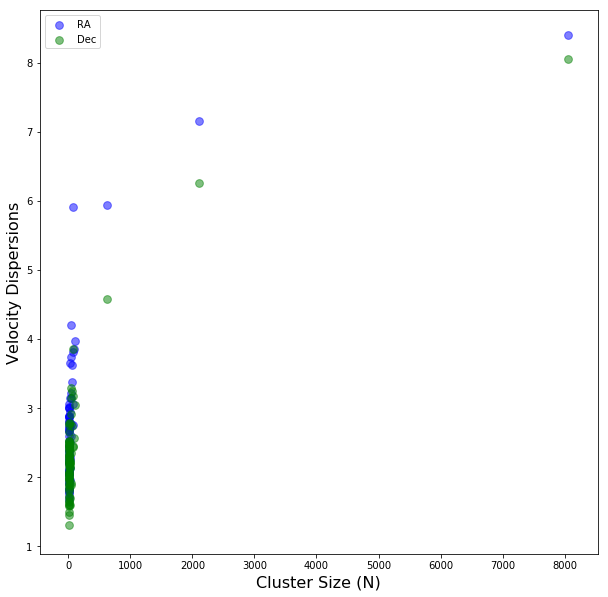

In [49]:
# Plot the velocity dispersions versus size of the cluster:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(cluster_sizes, pmra_disp, c='blue', s=60, alpha=0.5, label='RA')
ax.scatter(cluster_sizes, pmdec_disp, c='green', s=60, alpha=0.5, label='Dec')
ax.set_xlabel('Cluster Size (N)', fontsize=16)
ax.set_ylabel('Velocity Dispersions', fontsize=16)
plt.legend(loc='best')
plt.show()

In [50]:
# More Pearson_r calculations, this time for dispersions:
size_pmra = st.pearsonr(cluster_sizes, pmra_disp)
print('Cluster Size (N) vs Velocity Dispersion in RA:\n{}, {}\n'.format(size_pmra[0], size_pmra[1]))

size_pmdec = st.pearsonr(cluster_sizes, pmdec_disp)
print('Cluster Size (N) vs Velocity Dispersion in Dec:\n{}, {}\n'.format(size_pmdec[0], size_pmdec[1]))

pmra_pmdec = st.pearsonr(pmra_disp, pmdec_disp)
print('Velocity Dispersion in Dec vs Velocity Dispersion in RA:\n{}, {}\n'.format(pmra_pmdec[0], pmra_pmdec[1]))

Cluster Size (N) vs Velocity Dispersion in RA:
0.6916304733438308, 3.301955321390783e-12

Cluster Size (N) vs Velocity Dispersion in Dec:
0.8019402316744224, 1.887413495774108e-18

Velocity Dispersion in Dec vs Velocity Dispersion in RA:
0.7707420067072874, 2.4562338453718193e-16

